In [1]:
import json
import os, sys
import pickle
import datetime
import numpy as np
import ROOT as rt
import math
import pandas as pd

## user define
sys.path.append(".")
sys.path.append("./Utils")
from Plotter import HistStack

Welcome to JupyROOT 6.26/08


In [2]:
import sys
# CHANNEL = sys.argv[1]
# DATE = sys.argv[2]
INPUTDIR = sys.argv[1]
CHANNEL = sys.argv[2]
REGION = sys.argv[3]
DATE = sys.argv[4]

DUMP_PKL = True
DRAW_SR = True
RUN_SIDEBAND_MET = True
RUN_SIDEBAND_MASS = True
RUN_SIDEBAND_PT = True
DUMP_SIDEBAND_MET_PKL = True
DUMP_SIDEBAND_MASS_PKL = True
DUMP_SIDEBAND_PT_PKL = True
RUN_BTAG = False
EXPORT_VARIABLE = False

# # for dev
# CHANNEL = 'ee'
# DATE = '20230430wp80'
# # INPUTDIR = "/eos/user/h/hkwon/Run2/"+DATE+"/ee/"
# INPUTDIR = '/eos/user/h/hkwon/Run2/Preselection/20230430wp80/Presel'
# # 'Run2/Preselection/${DATE1}/Presel'

# REGION = "SR"

In [3]:
if REGION == 'SR':
    file = 'nested_dic_df.pkl'
if REGION == 'SR1':   
    file = 'nested_dic_df_SR1.pkl'
if REGION == 'TTCR':   
    file = 'nested_dic_df_TTCR.pkl'
    
with open(INPUTDIR+'/'+CHANNEL+'16pre/'+file, 'rb') as f:
    nested_dic_df = pickle.load(f)
with open(INPUTDIR+'/'+CHANNEL+'16post/'+file, 'rb') as f:
    nested_dic_df1 = pickle.load(f)    

dic_df_all = [nested_dic_df['raw'], nested_dic_df1['raw']]
dic_df_met_u_all = [nested_dic_df['met_u'], nested_dic_df1['met_u']]
dic_df_met_d_all = [nested_dic_df['met_d'], nested_dic_df1['met_d']]
dic_df_met_ue_u_all = [nested_dic_df['met_ue_u'], nested_dic_df1['met_ue_u']]
dic_df_met_ue_d_all = [nested_dic_df['met_ue_d'], nested_dic_df1['met_ue_d']]

selected_columns = [
#                     'MC1C1_pre', 'H3PP_pre', 'H3TPP_pre', 
                    'pt_lead_pre', 'mass_pre', # by auc rank
                    'MT_pre', 'pt_trail_pre', 'Zpt_pre', 'dRll_pre', 'PuppiMET_pre',
                    'dPhilMET_pre', 'dPhillMET_pre', 'U_pre', 'dPhill_pre', 'MT2_pre',
                    'JZB_pre']

dic_df, dic_df_met_u, dic_df_met_d, dic_df_met_ue_u, dic_df_met_ue_d = [{} for _ in range(5)]

for key in dic_df_all[0]:
    list_raw, list_met_u, list_met_d, list_met_ue_u, list_met_ue_d = [[] for _ in range(5)]
    for i in range(2):
        try:
            list_raw.append(dic_df_all[i][key])
            list_met_u.append(dic_df_met_u_all[i][key])
            list_met_d.append(dic_df_met_d_all[i][key])            
            list_met_ue_u.append(dic_df_met_ue_u_all[i][key])
            list_met_ue_d.append(dic_df_met_ue_d_all[i][key])
        except:
            print("missing:", key)
    dic_df[key]=pd.concat(list_raw, ignore_index=True)
    dic_df_met_u[key]=pd.concat(list_met_u, ignore_index=True)
    dic_df_met_d[key]=pd.concat(list_met_d, ignore_index=True)
    dic_df_met_ue_u[key]=pd.concat(list_met_ue_u, ignore_index=True)
    dic_df_met_ue_d[key]=pd.concat(list_met_ue_d, ignore_index=True)
    
dic_nested_shape_sys={}
dic_nested_shape_sys["raw"]=dic_df
dic_nested_shape_sys["met_u"]=dic_df_met_u
dic_nested_shape_sys["met_d"]=dic_df_met_d    
dic_nested_shape_sys["met_ue_u"]=dic_df_met_ue_u
dic_nested_shape_sys["met_ue_d"]=dic_df_met_ue_d 

print(dic_df["TT"].columns)
print(dic_df_met_u["TT"].columns)

Index(['PuppiMET_pre', 'mass_pre', 'pt_lead_pre', 'pt_trail_pre', 'U_pre',
       'JZB_pre', 'dPhill_pre', 'dPhilMET_pre', 'MT_pre', 'MT2_pre', 'Zpt_pre',
       'dRll_pre', 'dPhillMET_pre', 'MET_pre', 'MET_phi_pre',
       'PuppiMET_phi_pre', 'eta_lead_pre', 'eta_trail_pre', 'phi_lead_pre',
       'phi_trail_pre', 'njet_pre', 'nbjetflav_pre', 'genweight_u_pre',
       'genweight_d_pre', 'genweight_pre', 'puweight_pre', 'puweight_u_pre',
       'puweight_d_pre', 'l1prefiring_pre', 'l1prefiring_u_pre',
       'l1prefiring_d_pre', 'effSF_pre', 'effSF_u_pre', 'effSF_d_pre',
       'trigSF_pre', 'trigSF_u_pre', 'trigSF_d_pre', 'topSF_pre',
       'topSF_u_pre', 'topSF_d_pre', 'btagSF_pre', 'weight', 'wopu', 'wol1',
       'woeff', 'wotop', 'wobsf', 'weighthdampUp', 'weighthdampDown',
       'weightPSUp', 'weightPSDown', 'weightpuweightUp', 'weightpuweightDown',
       'weightl1prefiringUp', 'weightl1prefiringDown', 'weighteffSFUp',
       'weighteffSFDown', 'weighttopSFUp', 'weighttopSFDow

In [8]:
ERA = CHANNEL+"16"
# dic_variable={
#     "PuppiMET_pre": [14, 100, 660, "Puppi p_{T}^{miss} [GeV]"],    
#     "pt_lead_pre": [15, 80,  660, "p_{T}(l_{lead}) [GeV]"],
#     "pt_trail_pre": [15, 40, 520, "p_{T}(l_{trail}) [GeV]"], 
# }
dic_variable={
#     "PuppiMET_pre": [14, 100, 660, "Puppi p_{T}^{miss} [GeV]"],    
# #     "MET_pre": [28, 0, 660, "p_{T}^{miss} [GeV]"],    
#     "mass_pre": [22, 100, 1000, "M_{ll} [GeV]"],
    "pt_lead_pre": [15, 80,  660, "p_{T}(l_{lead}) [GeV]"],
    "pt_trail_pre": [15, 40, 520, "p_{T}(l_{trail}) [GeV]"],
#     "Zpt_pre": [25, 0, 500, "p_{T}(ll) [GeV]"],
#     "MT_pre": [27, 0, 550, "M_{T} [GeV]"],
#     "MT2_pre": [17, 0, 350, "M_{T2} [GeV]"],
#     "U_pre": [14, 0, 660, "U [GeV]"],
#     "JZB_pre": [14, 80, 660, "JZB"],
#     "dPhill_pre": [17, 0, 3.4, "#Delta#phi(l,l)"],
#     "dPhilMET_pre": [17, 0, 3.4, "#Delta#phi(l,p_{T}^{miss})"],
#     "dRll_pre": [30, 0, 6, "#DeltaR(l,l)"],
#     "dPhillMET_pre": [17, 0, 3.4, "#Delta#phi(ll,p_{T}^{miss})"],
# # #     "MC1C1_pre": [36, 180, 900, "MC1C1 [GeV]"], 
# # #     "H3PP_pre": [41, 80, 900, "H3PP [GeV]"], 
# # #     "H3TPP_pre": [40, 0, 800, "H3TPP [GeV]"], 
#     "eta_lead_pre": [15, -3, 3, "#eta(l_{lead})"],
#     "eta_trail_pre": [15, -3, 3, "#eta(l_{trail})"],
# # #     "phi_lead_pre": [40, -4, 4, "#phi(l_{lead})"],
# # #     "phi_trail_pre": [40, -4, 4, "#phi(l_{trail})"], 
#     "PuppiMET_phi_pre": [20, -4, 4, "Puppi p_{T}^{miss} #phi(l_{trail})"],     
    "nbjetflav_pre": [10, 0, 10, "N bjetflav"],     
#     "nbjet_pre": [10, 0, 10, "N bjet"],     
    "njet_pre": [10, 0, 10, "N jet"],     
#     "njet_l_pre": [10, 0, 10, "N  l jet"],     
#     "njet_c_pre": [10, 0, 10, "N  c jet"],     
#     "njet_b_pre": [10, 0, 10, "N  b jet"],     
#     "btagSF_pre": [100, 0, 10, "SV dxy"],     
}
if "em" in CHANNEL:
    dic_variable["pt_el_pre"] = [15, 20,  660, "p_{T}(e) [GeV]"]
    dic_variable["pt_mu_pre"] = [15, 20,  660, "p_{T}(#mu) [GeV]"]
list_variables = [(key, dic_variable[key]) for key in dic_variable]
# os.system("mkdir -p "+DATE+"/Presel/"+CHANNEL+"16/SR")

# for variable, r in dic_variable.items():
#     if not "Puppi" in variable:
#         threshold = 0.3
#     else:
#         threshold = 0.5
#     hist=HistStack(dic_df, variable, "weight", r[0], r[1], r[2], r[3])  
#     c1=hist.draw_hist("Zp-2500_CH-345", ERA, file_name=DATE+"/Presel/"+CHANNEL+"16/SR/norm_", blind_from=threshold) 
# hist.get_yeilds()
# hist.draw_pie(file_name=DATE+"/Presel/"+CHANNEL+"16/SR/pie_")  

In [9]:
import math
SYS_LIST = ["puweight", "l1prefiring", "effSF", "topSF", "met", "metue", "trigSF", "hdamp", "PS", "btagSF"]

# sys_list = ["puweight", "l1prefiring", "effSF", "topSF", "trigSF", "met", "scale"]
sys_list = SYS_LIST

def draw_with_systematics(dic_df_raw, dic_nested_shape_sys, sys_list, variable, r, region):
    dic_sys = {}
    dic_sys_sqr = {}
    # nominal weight plot
    hist=HistStack(dic_df_raw, variable, 'weight', r[0], r[1], r[2], r[3])            
    c1=hist.draw_hist("Zp-2500_CH-345", ERA, file_name=DATE+"/Presel/"+CHANNEL+"16/"+region+"/sys/norm_"+query_str)     
    dic_yields = hist.get_yields_by_bin()
    bkg_norm = dic_yields['bkg']

    for s in sys_list:
        if "met" in s or "scale" in s: # fill later
            continue
        # up
        hist=HistStack(dic_df_raw, variable, 'weight'+s+'Up', r[0], r[1], r[2], r[3])            
        c1=hist.draw_hist("Zp-2500_CH-345", ERA, file_name=DATE+"/Presel/"+CHANNEL+"16/"+region+"/sys/systUp_"+s+query_str)     
        dic_yields = hist.get_yields_by_bin()
        sysUp = dic_yields['bkg']
        dic_sys[s+'Up'] = np.array(sysUp) - np.array(bkg_norm)
        # down
        hist=HistStack(dic_df_raw, variable, 'weight'+s+'Down', r[0], r[1], r[2], r[3])            
        c1=hist.draw_hist("Zp-2500_CH-345", ERA, file_name=DATE+"/Presel/"+CHANNEL+"16/"+region+"/sys/systDown_"+s+query_str)     
        dic_yields = hist.get_yields_by_bin()
        sysDown = dic_yields['bkg']
        dic_sys[s+'Down'] = np.array(sysDown) - np.array(bkg_norm)
    if "el_pre" not in variable and "mu_pre" not in variable and "PuppiMET_phi_pre" not in variable: #temp
        # shape sys
        hist=HistStack(dic_nested_shape_sys['met_u'], variable, 'weightmetUp', r[0], r[1], r[2], r[3])            
        c1=hist.draw_hist("Zp-2500_CH-345", ERA, file_name=DATE+"/Presel/"+CHANNEL+"16/"+region+"/sys/systUp_"+s+query_str)     
        dic_yields = hist.get_yields_by_bin()
        sysUp = dic_yields['bkg']
        dic_sys['metUp'] = np.array(sysUp) - np.array(bkg_norm)
        hist=HistStack(dic_nested_shape_sys['met_d'], variable, 'weightmetDown', r[0], r[1], r[2], r[3])            
        c1=hist.draw_hist("Zp-2500_CH-345", ERA, file_name=DATE+"/Presel/"+CHANNEL+"16/"+region+"/sys/systUp_"+s+query_str)     
        dic_yields = hist.get_yields_by_bin()
        sysUp = dic_yields['bkg']
        dic_sys['metDown'] = np.array(sysUp) - np.array(bkg_norm)

        hist=HistStack(dic_nested_shape_sys['met_ue_u'], variable, 'weightmetueUp', r[0], r[1], r[2], r[3])            
        c1=hist.draw_hist("Zp-2500_CH-345", ERA, file_name=DATE+"/Presel/"+ERA+"/"+region+"/sys/systUp_"+s+query_str)     
        dic_yields = hist.get_yields_by_bin()
        sysUp = dic_yields['bkg']
        dic_sys['metueUp'] = np.array(sysUp) - np.array(bkg_norm)
        hist=HistStack(dic_nested_shape_sys['met_ue_d'], variable, 'weightmetueDown', r[0], r[1], r[2], r[3])            
        c1=hist.draw_hist("Zp-2500_CH-345", ERA, file_name=DATE+"/Presel/"+ERA+"/"+region+"/sys/systDown_"+s+query_str)     
        dic_yields = hist.get_yields_by_bin()
        sysUp = dic_yields['bkg']
        dic_sys['metueDown'] = np.array(sysUp) - np.array(bkg_norm)        
#     hist=HistStack(dic_nested_shape_sys['scale_u'], variable, 'weightscaleUp', r[0], r[1], r[2], r[3])            
#     c1=hist.draw_hist("Zp-2500_CH-345", ERA, file_name=DATE+"/Presel/"+ERA+"/"+region+"/sys/systUp_"+s+query_str)     
#     dic_yields = hist.get_yields_by_bin()
#     sysUp = dic_yields['bkg']
#     dic_sys['scaleUp'] = np.array(sysUp) - np.array(bkg_norm)
#     hist=HistStack(dic_nested_shape_sys['scale_d'], variable, 'weightscaleDown', r[0], r[1], r[2], r[3])            
#     c1=hist.draw_hist("Zp-2500_CH-345", ERA, file_name=DATE+"/Presel/"+ERA+"/"+region+"/sys/systUp_"+s+query_str)     
#     dic_yields = hist.get_yields_by_bin()
#     sysUp = dic_yields['bkg']
#     dic_sys['scaleDown'] = np.array(sysUp) - np.array(bkg_norm) 
    else:
#         sys_list = ["puweight", "l1prefiring", "effSF", "topSF"]
        sys_list = ["puweight", "l1prefiring", "effSF", "topSF", "trigSF", "hdamp", "PS"]
    # si^2
    for s in sys_list:
        # by source
        sqrUp = [x*x if x>0 else -x*x for x in dic_sys[s+'Up']]
        sqrUp_up = [x if x>0 else 0 for x in sqrUp]
        sqrUp_down = [x if x<0 else 0 for x in sqrUp]
        sqrDown = [x*x if x>0 else -x*x for x in dic_sys[s+'Down']]
        sqrDown_up = [x if x>0 else 0 for x in sqrDown]
        sqrDown_down = [x if x<0 else 0 for x in sqrDown]
        
        sqr_up = np.array(sqrUp_up) + np.array(sqrDown_up)
        sqr_down = np.array(sqrUp_down) + np.array(sqrDown_down)
        
        dic_sys_sqr[s+'Up'] = sqr_up
        dic_sys_sqr[s+'Down'] = np.fabs(sqr_down) #store absolute
        
#     print(dic_sys)
#     print(dic_sys_sqr)
    # sqrt(sumi si^2)
    for i, s in enumerate(sys_list):
        if i==0:
            sum_up = dic_sys_sqr[s+'Up'].copy() # be carefull not to use shallow copy
            sum_down = dic_sys_sqr[s+'Down'].copy()
        else:
            sum_up += dic_sys_sqr[s+'Up']
            sum_down += dic_sys_sqr[s+'Down']

    dic_sys_sqr['sum_up'] = np.sqrt(sum_up)
#     print(sum_up)
#     print(sum_down)
    dic_sys_sqr['sum_down'] = np.sqrt(sum_down)
    print(dic_sys_sqr)
            
    return dic_sys_sqr

In [10]:
from multiprocessing import Pool
def wrapper_mp(variable, r):
    
#     sys_list = ["wotop"] # other than 'weight'
#     for sys_key in sys_list:
#         os.system("mkdir -p "+DATE+"/Presel/"+ERA+"/"+sys_key)
#         hist=HistStack(dic_df_raw, variable, sys_key, r[0], r[1], r[2], r[3])            
#         c1=hist.draw_hist("Zp-2500_CH-345", ERA, file_name=DATE+"/Presel/"+ERA+"/"+sys_key+"/preselv1_"+query_str, is_dnn=False) 
    os.system("mkdir -p "+DATE+"/Presel/"+CHANNEL+"16/"+region)
    os.system("mkdir -p "+DATE+"/Presel/"+CHANNEL+"16/"+region+"/sys")
#     sys_list1 = ["puweight", "l1prefiring", "effSF", "topSF"]
#     sys_list1 = ["puweight", "l1prefiring", "effSF"]
    # draw plot with syst
    dic_sys_sqr = draw_with_systematics(dic_df, dic_nested_shape_sys, sys_list, variable, dic_variable[variable], region)
    
    print("here", dic_sys_sqr)
    
    hist=HistStack(dic_df, variable, 'weight', r[0], r[1], r[2], r[3], dic_sys=dic_sys_sqr) 
    threshold = 1
    if region=='SR':
        if not 'phi' in variable and not 'eta' in variable:
#         if not 'eta' in variable:
            threshold = 0.3
        if "PuppiMET_pre" in variable:
            threshold = 0.5
        
    c1=hist.draw_hist("Zp-2500_CH-345", ERA, file_name=DATE+"/Presel/"+CHANNEL+"16/"+region+"/systall_"+query_str, blind_from=threshold)   
    return None

{'puweightUp': array([ 0.        ,  0.        ,  1.83840395,  4.9263859 ,  5.13383343,
        1.31982711,  3.37351087,  3.15396449,  2.81715785,  2.55475394,
       18.67115978,  5.31474603,  2.95161588,  2.34746698, 15.10871866,
        2.43791709,  1.80910464,  0.82431636,  0.        ,  0.        ]), 'puweightDown': array([ 0.        ,  0.        ,  1.60941764,  7.97345313,  6.87072849,
        1.97930659,  3.08938399,  3.20616003,  4.559607  ,  6.74777579,
       27.04466127,  5.1703957 ,  4.51331968,  5.26820102, 19.71852365,
        3.25336651,  1.73399517,  0.        ,  0.        ,  0.        ]), 'l1prefiringUp': array([0.        , 0.        , 3.54964543, 6.31973054, 5.51513334,
       5.43556307, 6.44244821, 4.40146703, 5.27956535, 7.0498784 ,
       3.71751871, 5.47944665, 5.06084492, 5.01773994, 5.46299636,
       4.34478336, 5.5339813 , 4.91971801, 0.        , 0.        ]), 'l1prefiringDown': array([0.        , 0.        , 3.69682693, 6.53503437, 5.73677868,
       5.6593241

       14.1842378 , 13.92199419, 11.97500552,  0.        ,  0.        ])}
puweightUp
puweightDown
l1prefiringUp
l1prefiringDown
effSFUp
effSFDown
topSFUp
topSFDown
trigSFUp
trigSFDown
hdampUp
hdampDown
PSUp
PSDown
sum_up
sum_down
['puweight', 'l1prefiring', 'effSF', 'topSF', 'trigSF', 'hdamp', 'PS']
{'puweightUp': array([0.00000000e+00, 4.34367437e-02, 9.35877465e-01, 1.49927289e-01,
       1.36444797e+00, 1.65436341e-03, 2.92723533e+00, 1.18616504e-04,
       1.18112086e-01, 8.50038291e+00, 6.02633371e+00, 1.16534461e+01,
       4.50750859e+00, 5.83652854e+00, 6.66417355e+01, 7.45668975e+00,
       6.24632358e+00, 3.48079106e+00, 2.74147291e+00, 2.84098585e-01,
       9.63519976e-02, 5.07511243e-02, 1.39049430e-02, 4.85486935e-03,
       1.47002427e-03, 6.17470309e-04, 2.69722965e-08, 1.57415344e-06,
       0.00000000e+00, 0.00000000e+00]), 'puweightDown': array([0.00000000e+00, 5.04660733e-02, 7.11072887e-01, 2.14451490e-01,
       1.57603864e+00, 1.03171960e-01, 3.20785662e+00, 8.34

       0.00000000e+00, 0.00000000e+00])}
here {'puweightUp': array([0.00000000e+00, 4.34367437e-02, 9.35877465e-01, 1.49927289e-01,
       1.36444797e+00, 1.65436341e-03, 2.92723533e+00, 1.18616504e-04,
       1.18112086e-01, 8.50038291e+00, 6.02633371e+00, 1.16534461e+01,
       4.50750859e+00, 5.83652854e+00, 6.66417355e+01, 7.45668975e+00,
       6.24632358e+00, 3.48079106e+00, 2.74147291e+00, 2.84098585e-01,
       9.63519976e-02, 5.07511243e-02, 1.39049430e-02, 4.85486935e-03,
       1.47002427e-03, 6.17470309e-04, 2.69722965e-08, 1.57415344e-06,
       0.00000000e+00, 0.00000000e+00]), 'puweightDown': array([0.00000000e+00, 5.04660733e-02, 7.11072887e-01, 2.14451490e-01,
       1.57603864e+00, 1.03171960e-01, 3.20785662e+00, 8.34449374e-02,
       3.59209681e-02, 8.87930435e+00, 7.31987104e+00, 1.69212688e+01,
       6.76840331e+00, 1.69986090e+00, 9.66899187e+01, 1.29706330e+01,
       9.01354041e+00, 4.19269600e+00, 2.99941837e+00, 3.35344450e-01,
       1.05407698e-01, 8.18591

       0.00000000e+00, 0.00000000e+00])}
{'puweightUp': array([ 0.91052725,  1.40035874,  0.5322712 ,  1.19233812,  0.72531503,
        0.42430718,  3.21117605,  0.06521084,  1.79676241,  4.82694966,
       17.69629068, 18.91765216, 11.66405747, 25.43366347, 33.95841869,
       15.50753869,  0.        ]), 'puweightDown': array([ 0.83502582,  1.31081986,  0.57497869,  1.89887603,  1.17645193,
        0.48139411,  4.45036037,  0.25127109,  2.1586582 ,  5.465605  ,
       18.69244839, 17.92690706, 14.81441816, 27.18617506, 58.14565453,
       20.52561371,  0.        ]), 'l1prefiringUp': array([ 0.24631361,  0.19515142,  0.24913797,  1.17477121,  0.87899413,
        1.12472927,  1.90891269,  1.56045842,  3.36349301,  5.31100745,
        8.60902561, 12.775479  , 17.10620772, 25.35581123, 28.04268171,
       17.25402681,  0.        ]), 'l1prefiringDown': array([ 0.25195367,  0.19881733,  0.2551127 ,  1.20312162,  0.89692195,
        1.14779005,  1.93868621,  1.61591221,  3.46836302,  5.51345

       37.04833835,  0.        ])}
{'puweightUp': array([3.60088283e+02, 7.82438787e+01, 3.61741027e+01, 2.25759303e+01,
       3.79891382e+00, 6.66929795e+00, 3.06476844e-01, 1.53052469e-01,
       2.76404112e-01, 7.19814826e-03, 5.30069541e-03, 1.89247357e-04,
       5.04762453e-02, 5.77123656e-03, 1.35701826e-03, 6.69196008e-03,
       4.98120878e-03]), 'puweightDown': array([4.89554855e+02, 9.59006797e+01, 3.25248159e+01, 1.64624950e+01,
       6.13042348e+00, 7.70972414e+00, 4.76990861e-01, 3.57282190e-01,
       5.99115450e-01, 1.96302904e-03, 6.21317194e-03, 9.81109409e-04,
       4.35073372e-02, 3.49133126e-03, 1.09968458e-03, 7.22144603e-03,
       3.27365649e-03]), 'l1prefiringUp': array([2.78207102e+02, 3.12009906e+01, 3.31874095e+01, 2.16208249e+01,
       3.70843057e+00, 6.96142023e-01, 2.13521559e-01, 3.16657645e-02,
       3.98252530e-02, 3.74733698e-03, 7.19058630e-04, 6.85124024e-04,
       9.90435452e-05, 4.39856567e-05, 0.00000000e+00, 2.93315630e-05,
       3.566903

         2.56325052])}
{'puweightUp': array([0.00000000e+00, 1.37717889e-04, 1.44704885e-02, 0.00000000e+00,
       1.27847128e+00, 1.19831964e+01, 1.32792342e+01, 7.29621977e+00,
       5.35157210e+00, 1.35388817e+01, 9.55377574e-01, 2.15774802e+01,
       2.24604307e+00, 0.00000000e+00, 2.12472085e+00, 1.03535565e-02,
       5.33777591e+00, 6.35870232e+00, 1.86462588e+00, 3.12848275e+00,
       6.63342714e-01, 2.77330961e-01, 3.43762788e-02, 1.51248497e-01,
       2.11587812e-01, 1.11412502e-01, 1.86448937e-02]), 'puweightDown': array([1.99617067e-04, 5.28191368e-03, 6.84746658e-02, 1.40088421e-01,
       1.35885602e+00, 1.33408688e+01, 1.82737638e+01, 5.30147959e+00,
       7.64991774e+00, 1.84492981e+01, 1.84668943e+00, 2.32894612e+01,
       3.70252635e+00, 1.88575315e-01, 1.19815503e+00, 4.76095616e-01,
       7.60535660e+00, 9.56488804e+00, 1.81287433e+00, 3.74883554e-01,
       9.32160827e-01, 5.27981860e-01, 1.59302851e-01, 1.92111682e-01,
       2.40845182e-01, 1.12415360e-01

        2.50793113, 27.05285959])}
here {'puweightUp': array([0.00000000e+00, 1.37717889e-04, 1.44704885e-02, 0.00000000e+00,
       1.27847128e+00, 1.19831964e+01, 1.32792342e+01, 7.29621977e+00,
       5.35157210e+00, 1.35388817e+01, 9.55377574e-01, 2.15774802e+01,
       2.24604307e+00, 0.00000000e+00, 2.12472085e+00, 1.03535565e-02,
       5.33777591e+00, 6.35870232e+00, 1.86462588e+00, 3.12848275e+00,
       6.63342714e-01, 2.77330961e-01, 3.43762788e-02, 1.51248497e-01,
       2.11587812e-01, 1.11412502e-01, 1.86448937e-02]), 'puweightDown': array([1.99617067e-04, 5.28191368e-03, 6.84746658e-02, 1.40088421e-01,
       1.35885602e+00, 1.33408688e+01, 1.82737638e+01, 5.30147959e+00,
       7.64991774e+00, 1.84492981e+01, 1.84668943e+00, 2.32894612e+01,
       3.70252635e+00, 1.88575315e-01, 1.19815503e+00, 4.76095616e-01,
       7.60535660e+00, 9.56488804e+00, 1.81287433e+00, 3.74883554e-01,
       9.32160827e-01, 5.27981860e-01, 1.59302851e-01, 1.92111682e-01,
       2.40845182e-0

        2.50793113, 27.05285959])}
{'puweightUp': array([ 7.74089336, 19.43145266,  0.59779113,  4.2242686 ,  1.90005823,
        8.27797674,  3.64011103,  3.0619299 ,  3.69359487,  5.94839189,
        6.8835524 , 30.96051882,  0.8456045 ,  4.71364583,  0.        ,
        0.        ,  0.        ]), 'puweightDown': array([ 8.22337007, 22.78022919,  1.9155395 ,  5.06861726,  2.73359774,
        8.54322383,  4.25172681,  3.21725737,  3.24167787,  7.00826662,
        8.30822949, 35.82800286,  0.        ,  9.12631257,  1.20472192,
        0.46080451,  0.        ]), 'l1prefiringUp': array([11.74040058,  5.92012908,  6.66822154,  5.48564839,  5.18229883,
        3.96474868,  3.48539142,  2.98133958,  3.54287286,  3.19332808,
        3.32505249,  3.9589128 ,  5.49012732,  6.10917107,  9.74537418,
        5.53895932,  0.        ]), 'l1prefiringDown': array([12.03645595,  6.12596058,  6.83199337,  5.63777496,  5.37354212,
        4.11322539,  3.60422432,  3.11001947,  3.70674843,  3.32471968,
 

       20.03710319,  0.        ])}
{'puweightUp': array([1.97942169e+02, 1.41478373e+02, 4.15354869e+00, 2.61419759e+00,
       3.75173263e-01, 4.46410026e-01, 3.33815627e-01, 8.02170093e-01,
       3.26064232e-03, 5.43878461e-02, 1.36453455e-04, 0.00000000e+00,
       1.64736647e-03, 3.94927923e-04, 9.65161325e-04]), 'puweightDown': array([2.49080608e+02, 1.96784746e+02, 2.25432641e+00, 4.32982066e+00,
       9.36450919e-01, 6.28632331e-01, 2.67515895e-01, 7.50571424e-01,
       1.45677113e-02, 7.45823692e-02, 6.37598556e-04, 7.12966839e-04,
       4.26910058e-03, 2.23750153e-04, 1.86939320e-03]), 'l1prefiringUp': array([3.03452560e+02, 9.23134609e+01, 2.14261544e+01, 5.88239286e+00,
       1.44740710e+00, 3.36354985e-01, 4.90996433e-02, 2.90723704e-02,
       4.33161081e-03, 6.78317558e-04, 6.49829264e-04, 2.25536729e-04,
       4.96335995e-05, 3.55165789e-05, 2.26850532e-04]), 'l1prefiringDown': array([3.15998488e+02, 9.58577599e+01, 2.24152057e+01, 6.14495196e+00,
       1.50501875

         1.6373443 ,   0.84330783,   0.98517048])}
{'puweightUp': array([0.00000000e+00, 8.28547026e-01, 1.23045438e+00, 4.82719833e+00,
       2.05303437e+01, 2.45188812e+01, 3.34643286e+01, 2.92157092e+00,
       1.53913646e+01, 6.05327938e+01, 4.64485432e-03, 2.58594843e-01,
       0.00000000e+00, 3.70201475e-02, 0.00000000e+00]), 'puweightDown': array([ 0.        ,  0.91666723,  2.41893289,  4.89043759, 26.6788075 ,
       33.27817628, 46.63404046,  0.2082327 , 26.42365957, 64.7378076 ,
        0.14012501,  0.5411242 ,  0.12526267,  0.11331122,  0.        ]), 'l1prefiringUp': array([ 0.        ,  3.63918055,  4.64032205,  1.84296475,  6.30043832,
        8.76658873, 13.77862335, 12.799122  , 15.59676286, 12.06006211,
       11.30826379,  2.67635071, 11.45144911,  5.9198423 ,  0.        ]), 'l1prefiringDown': array([ 0.        ,  3.62455075,  4.72458466,  1.9508252 ,  6.65775603,
        9.39352112, 14.6461729 , 13.7290239 , 16.54792549, 12.7506699 ,
       11.80251781,  2.77369851,

       25.8542542 , 12.17199247, 15.96199373,  3.58610521,  0.        ])}
{'puweightUp': array([2.44316936e-01, 8.23459524e+00, 1.23426159e+01, 4.23390677e+01,
       4.86635535e+01, 2.45079556e+01, 1.09656609e+01, 3.87005691e+00,
       0.00000000e+00, 1.68421600e+00, 2.01500248e-01, 5.65839565e-01,
       7.35185841e-01, 5.69227074e-02, 0.00000000e+00, 1.75618170e-02,
       2.47740701e-01, 8.28488226e-02, 8.60202122e-02, 0.00000000e+00,
       3.99749885e-03, 0.00000000e+00, 8.19568437e-03, 1.21740187e-01,
       1.09049710e+00]), 'puweightDown': array([2.39229763e-01, 1.38805092e+01, 1.54148472e+01, 5.00466002e+01,
       5.51598079e+01, 3.40333327e+01, 1.46660744e+01, 2.48595251e+00,
       1.94620877e-01, 1.78962122e+00, 3.43056927e-01, 8.77807169e-01,
       8.66953579e-01, 4.82246346e-02, 9.23477140e-04, 2.25716388e-03,
       2.79965611e-01, 9.67006410e-02, 9.49777486e-02, 7.70163477e-03,
       5.30266391e-03, 7.06604256e-03, 1.08577407e-02, 7.61165319e-02,
       9.05589920e

        1.61027236,  2.6658968 ,  1.99016252,  1.67611488,  5.09698399])}
{'puweightUp': array([5.15565674e+02, 2.23187181e+01, 3.10194329e+00, 7.62327000e-01,
       2.96318280e-01, 5.74918793e-01, 4.44284807e-02, 1.56417239e-01,
       3.65426462e-03, 0.00000000e+00, 3.15982644e-04, 1.00683249e-04,
       1.66390306e-04, 5.71862003e-06, 1.44952743e-04]), 'puweightDown': array([6.92069188e+02, 3.87748319e+01, 1.47803045e+00, 5.18105939e-01,
       3.15096994e-01, 4.64750883e-01, 4.50875027e-02, 1.19968671e-01,
       6.88459269e-03, 1.33898782e-04, 3.73019749e-04, 4.91214372e-05,
       9.00124608e-05, 1.99796461e-05, 4.62169770e-04]), 'l1prefiringUp': array([4.45064980e+02, 1.05739202e+02, 1.20530056e+01, 9.52545441e-01,
       1.26049666e-01, 1.98166879e-02, 1.65915304e-03, 4.74668809e-04,
       3.50694462e-05, 3.64557266e-05, 2.57769372e-05, 3.94428563e-05,
       1.98108374e-06, 2.01110379e-06, 3.52280202e-05]), 'l1prefiringDown': array([4.65585443e+02, 1.09643153e+02, 1.24514157

       6.80806913e-02, 1.09592349e-01, 6.09148482e-02])}
{'puweightUp': array([2.33099545e+01, 7.72116491e+01, 4.32045602e+01, 3.38625986e+01,
       1.08886742e+01, 1.52552267e+00, 2.99853001e+00, 0.00000000e+00,
       4.84681933e-01, 2.84786818e-01, 4.34475322e-04, 1.10972160e-01,
       2.41286587e-03, 7.87347525e-03, 5.02868494e-04, 3.73342373e-03,
       8.27795317e-04, 6.40107196e-03, 4.14786358e-04, 1.33994691e-05,
       1.48273906e-03, 7.84145648e-03]), 'puweightDown': array([3.46717697e+01, 9.93665876e+01, 5.91934880e+01, 4.18906850e+01,
       1.48075512e+01, 2.70294222e+00, 4.22052024e-01, 2.12385113e-02,
       5.09501607e-01, 4.26616793e-01, 0.00000000e+00, 1.73029677e-01,
       4.28186810e-03, 1.04835391e-02, 1.19717818e-04, 2.82469707e-03,
       2.21204980e-03, 6.26600774e-03, 1.14400630e-03, 2.39511744e-05,
       1.24151865e-03, 1.03220553e-02]), 'l1prefiringUp': array([4.36098142e+01, 6.64844145e+01, 4.61310077e+01, 2.09563421e+01,
       9.36856039e+00, 5.2292163

        0.10679483,  0.30906447])}
{'puweightUp': array([0.00000000e+00, 9.22336769e-01, 6.24344898e+00, 4.67485253e-01,
       1.35880675e-02, 8.60061246e+00, 3.66944200e+01, 1.25233878e+01,
       7.34715709e+01, 7.63338842e+00, 1.49604303e+00, 2.59741438e-02,
       5.60059107e+00, 1.93674233e-01, 0.00000000e+00]), 'puweightDown': array([ 0.        ,  0.89857267,  7.71809827,  0.09190355,  1.37549348,
       11.07861289, 49.93533496, 13.85256706, 84.34842932, 13.78300698,
        0.24367302,  0.29392518,  8.90992476,  0.17503607,  0.        ]), 'l1prefiringUp': array([ 0.        ,  2.84142784,  4.63917746,  2.14427172,  9.17629102,
        8.69187869, 10.9783074 , 11.69501512, 13.45435961, 11.52234063,
       14.78668793,  2.82927326,  8.88147438,  8.02676832,  0.        ]), 'l1prefiringDown': array([ 0.        ,  2.80075735,  4.83215302,  2.23939326,  9.67966666,
        9.28065666, 11.68080803, 12.48003073, 14.32802394, 12.25364402,
       15.39481003,  2.93882683,  8.89247543,  7

       28.25380115, 15.45767736, 12.29535801,  4.42430539,  0.        ])}
{'puweightUp': array([14.85907271, 19.45497099, 10.66392109,  3.39963014,  6.30867855,
        0.16526307,  0.02501255,  0.57205053,  1.59166984,  0.61713932,
        0.03095366,  0.08976955,  9.17057255, 23.70855876,  4.18031788,
        3.17900259,  0.        ]), 'puweightDown': array([1.98204111e+01, 2.01389537e+01, 9.35192198e+00, 5.30526126e+00,
       6.91141131e+00, 4.95176784e-01, 1.49270847e-02, 5.84300290e-01,
       2.21024663e+00, 1.50700490e+00, 2.57093714e-03, 5.82693680e-01,
       1.06710661e+01, 3.27719305e+01, 1.15731717e+01, 1.83424207e+00,
       0.00000000e+00]), 'l1prefiringUp': array([ 9.77149471, 10.68439095,  8.23124779,  6.41262503,  4.08618262,
        2.44889534,  2.10134442,  1.41792158,  1.3138748 ,  1.93831949,
        2.48587448,  3.55833103,  6.98679277,  9.28078229, 14.12293648,
        8.67745169,  0.        ]), 'l1prefiringDown': array([10.05436194, 10.99252253,  8.5099263 ,  6

       22.97574864,  0.        ])}
{'puweightUp': array([ 1.281543  ,  2.5302925 , 62.92839369, 28.34016404, 37.73868263,
        6.59873124,  3.18892659,  3.39799036,  1.55772469,  0.50064604,
        0.12658746,  0.11768558,  0.29786834,  0.59728308]), 'puweightDown': array([4.13440792e+00, 3.02778410e+00, 8.73095075e+01, 3.38326788e+01,
       4.57359570e+01, 8.89740696e+00, 4.66226901e+00, 3.49088675e+00,
       2.35633846e+00, 4.34344379e-01, 1.24160130e-01, 1.68002180e-01,
       8.53210022e-02, 4.60293640e-01]), 'l1prefiringUp': array([4.87702383e+00, 3.12131535e+01, 4.81233838e+01, 4.21966776e+01,
       2.93578959e+01, 1.79007497e+01, 4.48550048e+00, 1.47072359e+00,
       7.08830992e-01, 2.58612713e-01, 1.33339396e-01, 2.44464375e-02,
       1.36138908e-02, 4.87870214e-02]), 'l1prefiringDown': array([5.22233886e+00, 3.29927404e+01, 5.05088036e+01, 4.42544465e+01,
       3.01822845e+01, 1.83126790e+01, 4.60166284e+00, 1.50698706e+00,
       7.21508818e-01, 2.72407923e-01, 1.37

        3.62287953,  3.13650536,  1.83908721,  4.1848598 ])}
{'puweightUp': array([7.19705818e+01, 4.19773429e+01, 9.33522158e+00, 1.17312085e-01,
       4.49680224e-01, 1.52902313e-02, 2.67676881e-01, 7.05523984e-02,
       1.27390235e-02, 2.04312070e-08, 3.19028075e-03, 8.52989741e-04,
       9.88342630e-04, 1.99725445e-03]), 'puweightDown': array([8.32170836e+01, 5.10276234e+01, 9.93011757e+00, 2.03924450e-01,
       6.94969527e-01, 6.48187118e-02, 2.30900344e-01, 1.04850419e-03,
       1.03145263e-02, 6.50709535e-04, 3.18931862e-03, 1.46396429e-03,
       1.21974950e-03, 4.28137726e-03]), 'l1prefiringUp': array([8.81047597e+01, 2.90011129e+01, 5.13240598e+00, 1.20206605e+00,
       2.92186377e-01, 9.38590837e-02, 2.48811265e-02, 6.22214290e-03,
       3.49769214e-03, 1.02889669e-03, 4.36759119e-05, 3.71905905e-05,
       6.24895652e-05, 1.29633709e-04]), 'l1prefiringDown': array([9.10959286e+01, 2.98527463e+01, 5.28081435e+00, 1.23788230e+00,
       3.00734566e-01, 9.75012726e-02, 

        0.34492415,  0.5557467 ,  0.32253529,  0.48893109])}
{'puweightUp': array([2.30675775e+02, 7.09198543e+01, 1.60777959e+01, 2.27322404e+00,
       1.96292705e+00, 3.31664079e-01, 1.08358480e-01, 2.27265877e-02,
       5.42332642e-04, 0.00000000e+00, 1.48512186e-02, 6.46311440e-03,
       1.49777891e-01, 4.04566418e-04]), 'puweightDown': array([3.20679332e+02, 8.81344468e+01, 1.95709443e+01, 2.58571685e+00,
       2.36881387e+00, 4.62293643e-01, 1.72104121e-01, 2.55345557e-02,
       1.62639723e-03, 1.02183784e-04, 1.34989641e-02, 7.00346549e-03,
       2.11580055e-02, 1.56530305e-03]), 'l1prefiringUp': array([4.38732275e+02, 6.76884993e+01, 1.39466222e+01, 2.76811290e+00,
       6.83532661e-01, 2.71948951e-01, 4.14730717e-02, 1.73343732e-02,
       9.16670754e-03, 3.40064017e-04, 3.41905844e-05, 8.51603239e-05,
       3.12865532e-04, 2.44201810e-04]), 'l1prefiringDown': array([4.58484699e+02, 7.04501859e+01, 1.44784968e+01, 2.86146282e+00,
       7.04865317e-01, 2.81610797e-01, 

         0.97410292,   0.90092635])}
puweightUp
puweightDown
l1prefiringUp
l1prefiringDown
effSFUp
effSFDown
topSFUp
topSFDown
trigSFUp
trigSFDown
metUp
metDown
hdampUp
hdampDown
PSUp
PSDown
sum_up
sum_down
['puweight', 'l1prefiring', 'effSF', 'topSF', 'trigSF', 'met', 'hdamp', 'PS']
puweightUp
puweightDown
l1prefiringUp
l1prefiringDown
effSFUp
effSFDown
topSFUp
topSFDown
trigSFUp
trigSFDown
metUp
metDown
hdampUp
hdampDown
PSUp
PSDown
sum_up
sum_down
['puweight', 'l1prefiring', 'effSF', 'topSF', 'trigSF', 'met', 'hdamp', 'PS']
puweightUp
puweightDown
l1prefiringUp
l1prefiringDown
effSFUp
effSFDown
topSFUp
topSFDown
trigSFUp
trigSFDown
metUp
metDown
hdampUp
hdampDown
PSUp
PSDown
sum_up
sum_down
['puweight', 'l1prefiring', 'effSF', 'topSF', 'trigSF', 'met', 'hdamp', 'PS']
puweightUp
puweightDown
l1prefiringUp
l1prefiringDown
effSFUp
effSFDown
topSFUp
puweightUptopSFDown

puweightDowntrigSFUp

l1prefiringUptrigSFDown

l1prefiringDownmetUp

effSFUpmetDown

hdampUpeffSFDown

hdampDowntopSFU

Info in <TCanvas::Print>: pdf file 20230430wp80/Presel/ee16/SR/sys/norm_mass_pre>100 and pt_lead_pre>80 and pt_trail_pre>40 and PuppiMET_pre>100_dPhill_prebreakdown.pdf has been created
Info in <TCanvas::Print>: pdf file 20230430wp80/Presel/ee16/SR/sys/norm_mass_pre>100 and pt_lead_pre>80 and pt_trail_pre>40 and PuppiMET_pre>100_eta_trail_prebreakdown.pdf has been created
Info in <TCanvas::Print>: pdf file 20230430wp80/Presel/ee16/SR/sys/norm_mass_pre>100 and pt_lead_pre>80 and pt_trail_pre>40 and PuppiMET_pre>100_eta_lead_prebreakdown.pdf has been created
Info in <TCanvas::Print>: pdf file 20230430wp80/Presel/ee16/SR/sys/norm_mass_pre>100 and pt_lead_pre>80 and pt_trail_pre>40 and PuppiMET_pre>100_Zpt_prebreakdown.pdf has been created
Info in <TCanvas::Print>: pdf file 20230430wp80/Presel/ee16/SR/sys/norm_mass_pre>100 and pt_lead_pre>80 and pt_trail_pre>40 and PuppiMET_pre>100_dPhill_pre.pdf has been created
Info in <TCanvas::Print>: pdf file 20230430wp80/Presel/ee16/SR/sys/norm_mass_

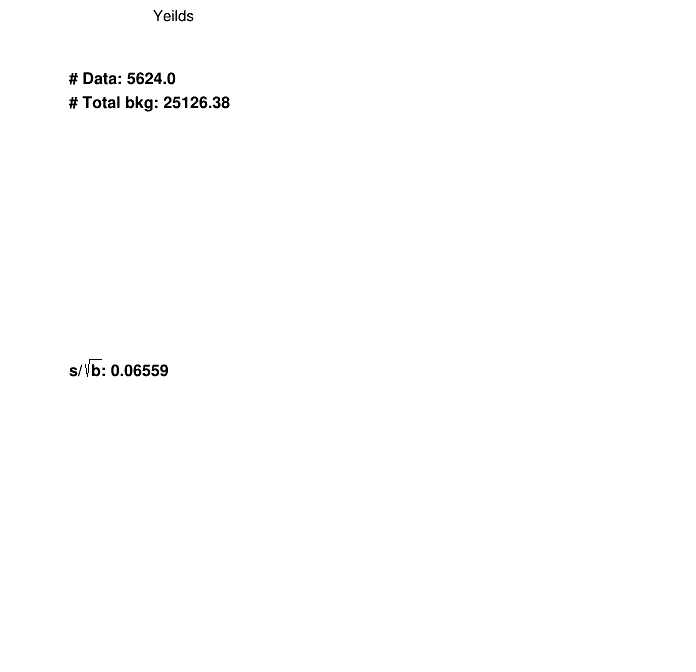

In [11]:
if DRAW_SR:
    region = REGION
    if region == "SR": # for file name only
        query_str = "mass_pre>100 and pt_lead_pre>80 and pt_trail_pre>40 and PuppiMET_pre>100"
    if region == "SR1":
        query_str = "mass_pre>100 and pt_lead_pre>80 and pt_trail_pre>40 and PuppiMET_pre>100 and btag==0"
    if region == "TTCR":
        query_str = "mass_pre>100 and pt_lead_pre>80 and pt_trail_pre>40 and PuppiMET_pre>100 and btag>0"
        
    with Pool() as p:
        p.starmap(wrapper_mp, list_variables) 
#     wrapper_mp('mass_pre', [45, 100, 1000, 'M_{ll} [GeV]'])

    # for pie chart
    hist=HistStack(dic_df, "pt_lead_pre", "weight", 31, 80,  660, "p_{T}(l_{lead}) [GeV]") 
    c1=hist.draw_hist("Zp-2500_CH-345", ERA, file_name=DATE+"/Presel/"+CHANNEL+"16/"+region+"/preselv1_"+query_str) 
    hist.get_yeilds()
    hist.draw_pie(file_name=DATE+"/Presel/"+CHANNEL+"16/"+region+"/pie_"+query_str)

In [12]:
if DUMP_PKL:
    if REGION == 'SR1':
        file = 'nested_dic_df_SR1.pkl'
    if REGION == 'TTCR':   
        file = 'nested_dic_df_TTCR.pkl'
    print("Dump pickle")
    with open(DATE+"/Presel/"+CHANNEL+"16/"+file, "wb") as f:
        pickle.dump(dic_nested_shape_sys, f) 

Dump pickle


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Info in <TCanvas::Print>: pdf file 20230430wp80/Presel/ee16/SR/sig_eff.pdf has been created


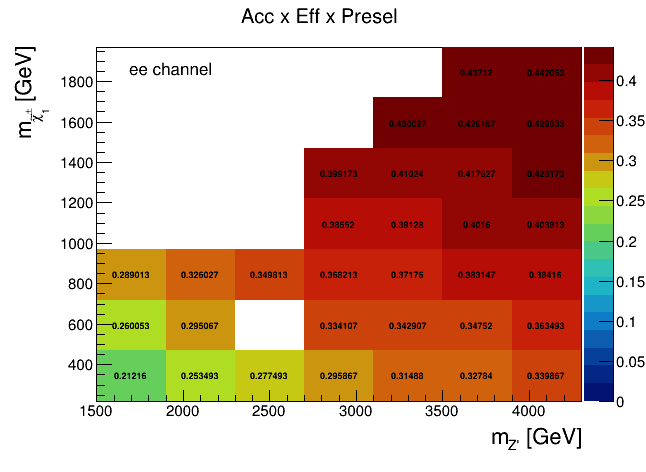

In [13]:
str_channel, str_lumi = HistStack.get_str_lumi_channel(ERA, ERA)

Zp_mass=[1700, 2100, 2500, 2900, 3300, 3700, 4100]
CH_mass=[345, 595, 845, 1095, 1345, 1595, 1845]
c1=rt.TCanvas("c1", "c1", 650, 500)
c1.SetLeftMargin(0.15)
c1.SetBottomMargin(0.15)
h2d1=rt.TH2D("h2d1", "", len(Zp_mass), Zp_mass[0]-200, Zp_mass[-1]+200, len(CH_mass), CH_mass[0]-125, CH_mass[-1]+125)
h2d1.SetTitle("Acc x Eff x Presel")

n_sig_in = 150000/4
if "em" in CHANNEL:
    n_sig_in = 150000/2

for key in dic_df:
    if not "Zp" in key:
        continue
    tmp=key.replace('_', '-')
    tmp=tmp.split('-')
    
    MZp=tmp[1]
    MCH=tmp[3]
    binx=Zp_mass.index(int(MZp))+1
    biny=CH_mass.index(int(MCH))+1
    h2d1.SetBinContent(binx, biny, dic_df[key].shape[0]/(n_sig_in))
# # missing bin by hand
# h2d1.SetBinContent(5, 3, 40000/(n_sig_in)) #mumu: 23500, #ee: 20000
# h2d1.SetBinContent(3, 4, 40000/(n_sig_in)) #mumu: 23500, #ee: 20000

# set_palette("rainbow",255)
rt.gStyle.SetOptStat(0)
rt.gStyle.SetPalette(55)

h2d1.Draw("colz text")
h2d1.SetYTitle("m_{#tilde#chi_{1}^{#pm}} [GeV]")
h2d1.SetXTitle("m_{Z'} [GeV]")
h2d1.GetYaxis().SetTitleSize(0.05)
h2d1.GetXaxis().SetTitleSize(0.05)
latex=rt.TLatex()
latex.DrawLatexNDC( 0.2,0.84, "#scale[0.8]{#font[42]{"+str_channel+" channel}}")

latex1=rt.TLatex()
latex1.DrawLatexNDC(0.71, 0.92, "#font[42]{#scale[0.8]{"+str_lumi+" fb^{-1}(13 TeV)}}");
latex1.DrawLatexNDC(0.13, 0.92, "#font[62]{CMS}#font[42]{#it{#scale[0.8]{ Preliminary}}}");

c1.Draw()
c1.SaveAs(DATE+"/Presel/"+CHANNEL+"16/"+REGION+"/sig_eff.pdf")